Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df=pd.read_csv('heart.csv')
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.describe(include=['O'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Univarient analysis of age

<AxesSubplot:xlabel='Age', ylabel='Count'>

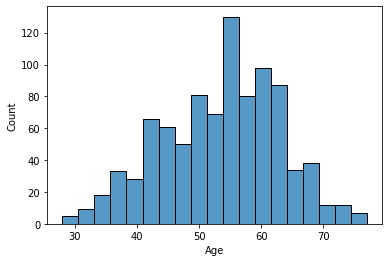

In [16]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

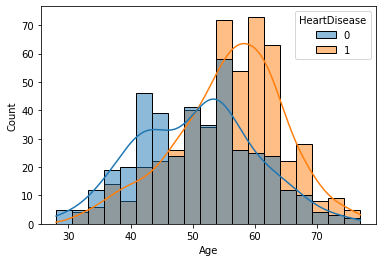

In [23]:
sns.histplot(data=df,x=df['Age'],kde=True,hue='HeartDisease')

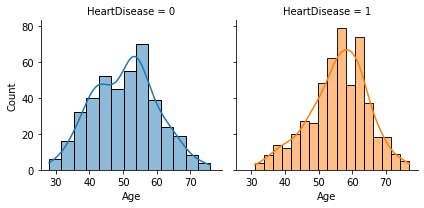

In [29]:
g=sns.FacetGrid(df,col='HeartDisease',hue='HeartDisease')
g=g.map(sns.histplot,'Age',kde=True)


In [52]:
px.box(data_frame=df,
    x=df.HeartDisease,
    y=df.Age,
    color=df.HeartDisease)

In [31]:
px.histogram(df,df.Age,color=df.HeartDisease)

### Univarient Analysis RestingBP

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

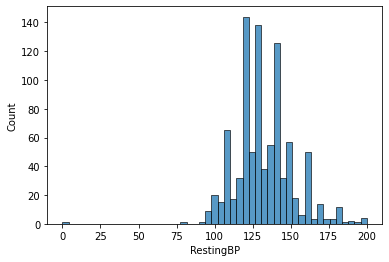

In [34]:
sns.histplot(df['RestingBP'])

In [43]:
fig=px.histogram(df,df.RestingBP)
fig.update_layout(
    autosize=False,
    width=500,
    height=400,)

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

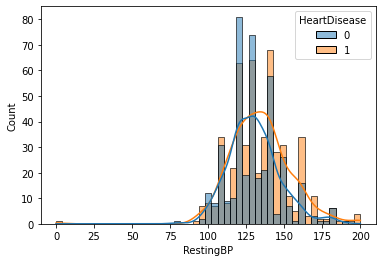

In [44]:
sns.histplot(data=df,x=df['RestingBP'],kde=True,hue='HeartDisease')

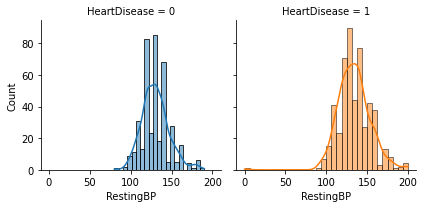

In [45]:
g=sns.FacetGrid(df,col='HeartDisease',hue='HeartDisease')
g=g.map(sns.histplot,'RestingBP',kde=True)

In [46]:
px.histogram(df,df.RestingBP,color=df.HeartDisease)

In [51]:
px.box(data_frame=df,
    x=df.HeartDisease,
    y=df.RestingBP,
    color=df.HeartDisease)

### Univarient Analysis on Cholesterol

In [54]:

fig=px.histogram(df,df.Cholesterol)
fig.update_layout(
    autosize=False,
    width=500,
    height=400,)

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

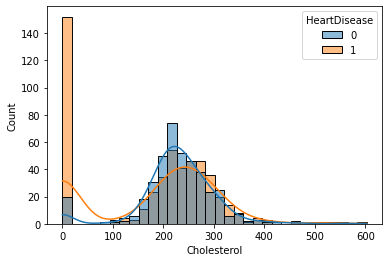

In [55]:
sns.histplot(data=df,x=df['Cholesterol'],kde=True,hue='HeartDisease')

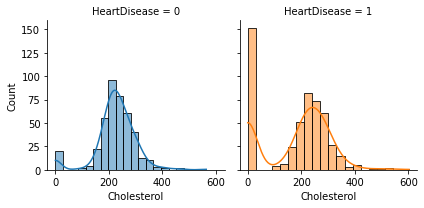

In [58]:
g=sns.FacetGrid(df,col='HeartDisease',hue='HeartDisease')
g=g.map(sns.histplot,'Cholesterol',kde=True,bins=20)

In [59]:
px.histogram(df,df.Cholesterol,color=df.HeartDisease)

In [60]:
px.box(data_frame=df,
    x=df.HeartDisease,
    y=df.Cholesterol,
    color=df.HeartDisease)

### Univerient Analysis on MaxHR (Max Heart Rate)

In [62]:


fig=px.histogram(df,df.MaxHR)
fig.update_layout(
    autosize=False,
    width=500,
    height=400,)

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

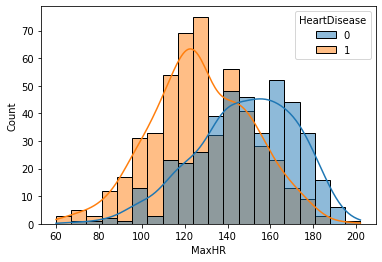

In [63]:
sns.histplot(data=df,x=df['MaxHR'],kde=True,hue='HeartDisease')

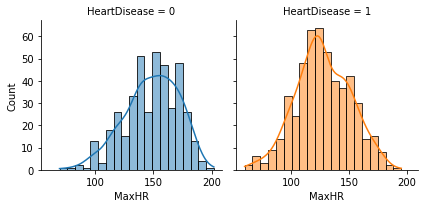

In [64]:
g=sns.FacetGrid(df,col='HeartDisease',hue='HeartDisease')
g=g.map(sns.histplot,'MaxHR',kde=True,bins=20)

In [65]:
px.histogram(df,df.MaxHR,color=df.HeartDisease)

In [66]:
px.box(data_frame=df,
    x=df.HeartDisease,
    y=df.MaxHR,
    color=df.HeartDisease)

### Univarient analysis on Catagorical columns

In [71]:
df['Sex'].value_counts()

M    0.78976
F    0.21024
Name: Sex, dtype: float64

In [74]:
g=df.groupby('Sex')
g['HeartDisease'].mean()

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

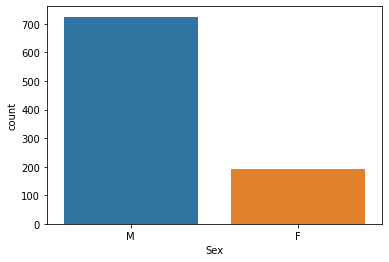

In [88]:
sns.countplot(x=df.Sex)

<AxesSubplot:xlabel='Sex', ylabel='count'>

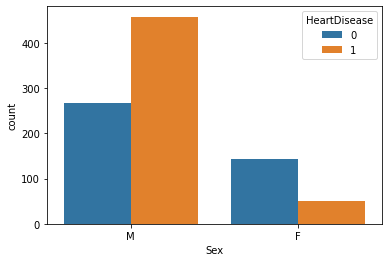

In [87]:
sns.countplot(x=df.Sex,hue=df.HeartDisease,)

In [101]:
fig=px.histogram(data_frame=df,x='Sex',color='HeartDisease',barmode='group')
fig.update_layout(
    autosize=False,
    width=500,
    height=400,)

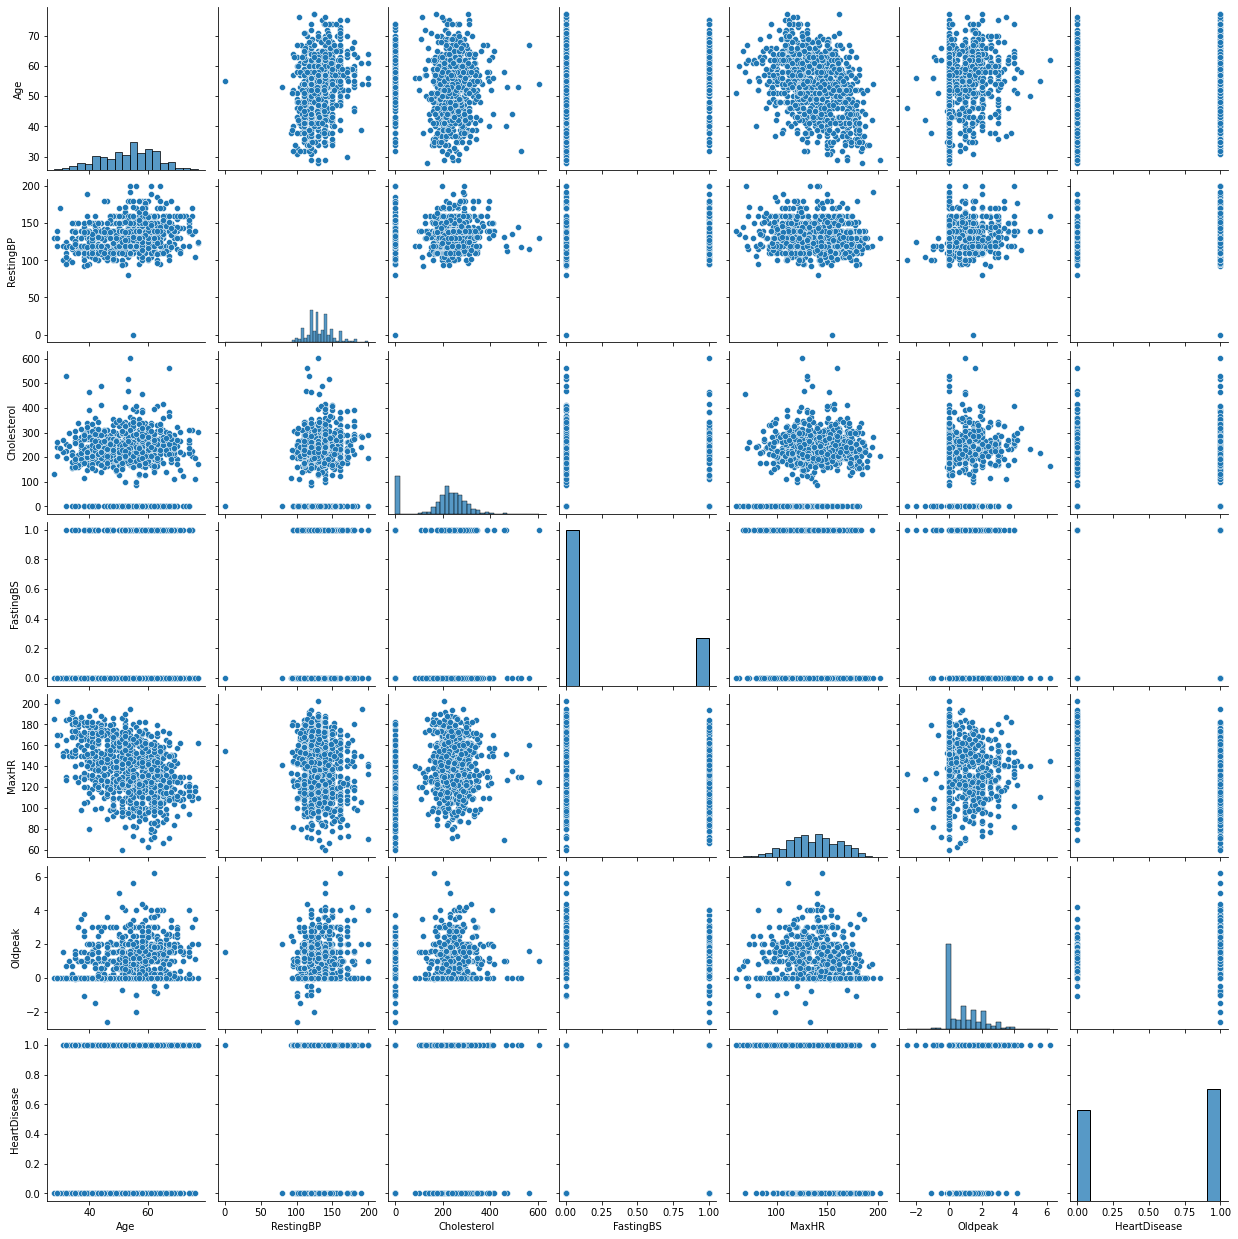

In [102]:
sns.pairplot(df)